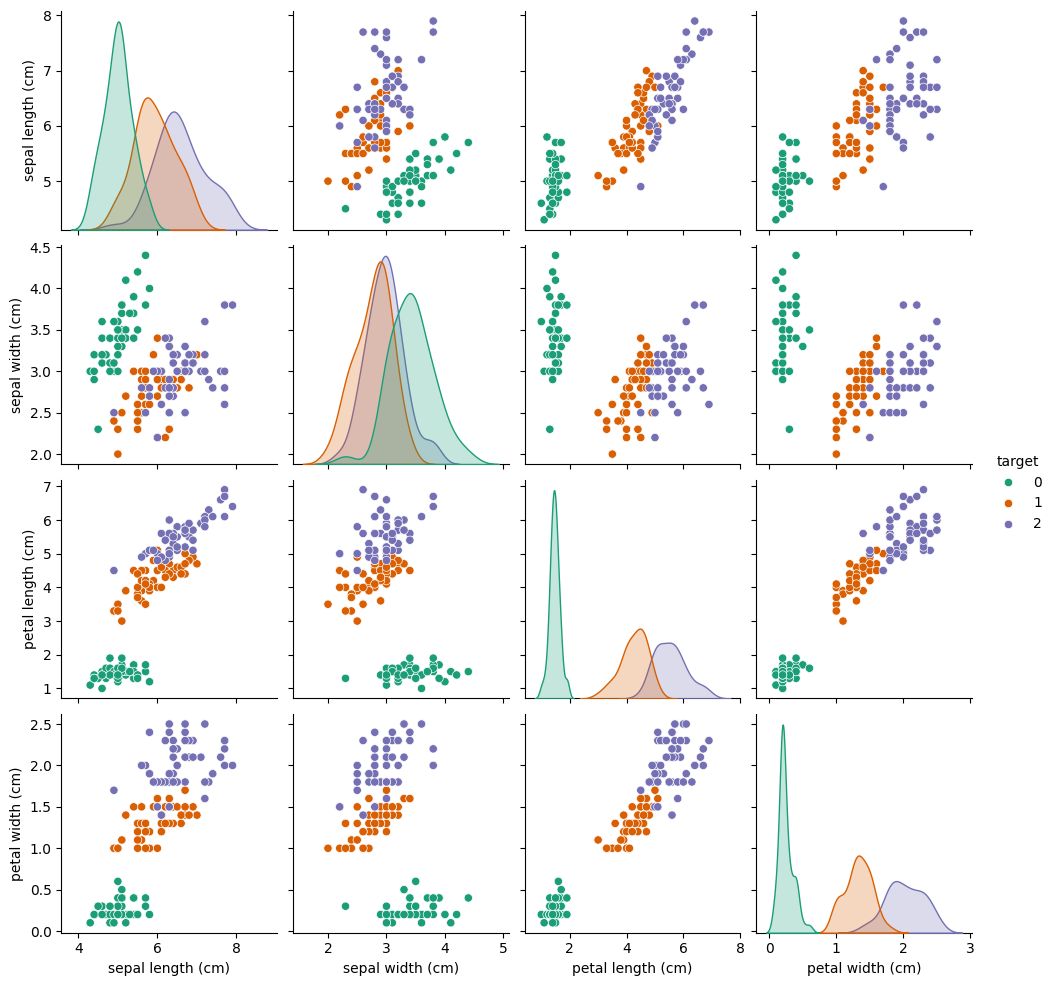

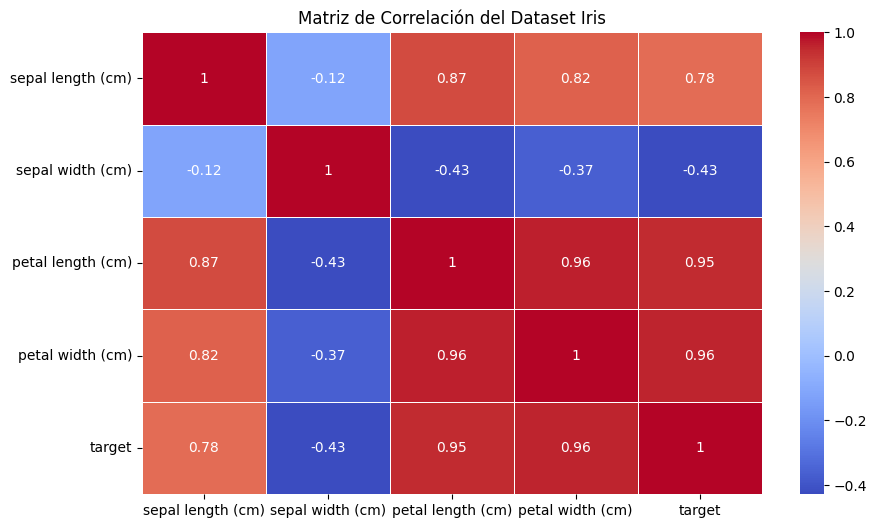

C:\Users\felip\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy MLP: 0.97
Matriz de Confusión - MLP:


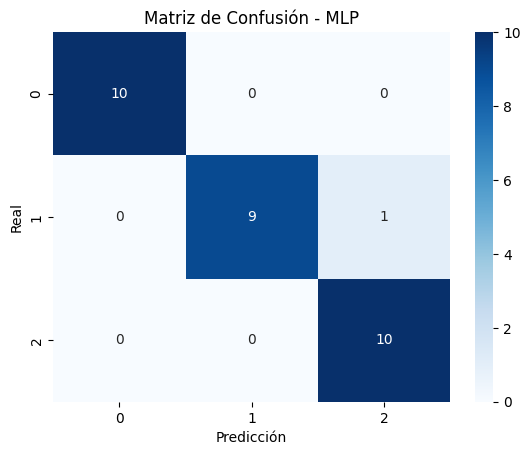

Reporte de Clasificación - MLP:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy Random Forest: 0.90
Matriz de Confusión - Random Forest:


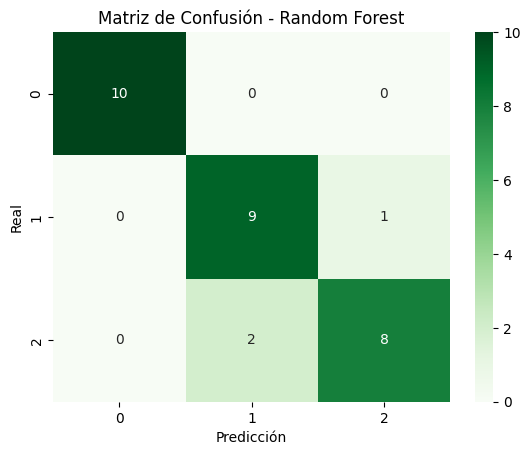

Reporte de Clasificación - Random Forest:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30


Conclusión:
- La Red Neuronal Multicapa (MLP) alcanzó una precisión de 0.97.
- El modelo Random Forest alcanzó una precisión de 0.90.
- Dependiendo del problema, un modelo puede ser más útil que otro.



In [2]:
# Importación de librerías necesarias
import numpy as np  # Para operaciones numéricas
import pandas as pd  # Para manejar datos en tablas
import matplotlib.pyplot as plt  # Para generar gráficos
import seaborn as sns  # Para visualización avanzada
from sklearn.datasets import load_iris  # Dataset de flores Iris
from sklearn.model_selection import train_test_split  # Para dividir los datos en entrenamiento y prueba
from sklearn.preprocessing import StandardScaler  # Para normalizar los datos
from sklearn.neural_network import MLPClassifier  # Modelo de red neuronal multicapa
from sklearn.ensemble import RandomForestClassifier  # Comparación con Random Forest
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Métricas de evaluación

# Introducción
"""
Este script implementa una Red Neuronal Multicapa (MLP) para clasificar flores en el dataset Iris.
Además, compara el desempeño del MLP con un modelo de Random Forest para analizar cuál tiene mejor precisión.
"""

# Cargar el dataset Iris
data = load_iris()  # Se carga el conjunto de datos Iris
df = pd.DataFrame(data.data, columns=data.feature_names)  # Convertimos a DataFrame para manipulación
df['target'] = data.target  # Agregamos la columna de etiquetas (tipos de flores)

# Visualización del dataset con un gráfico de dispersión
sns.pairplot(df, hue='target', palette='Dark2')  # Muestra la relación entre características por clase
plt.show()  # Se muestra la gráfica

# Visualización de la correlación entre características usando un heatmap
plt.figure(figsize=(10,6))  # Define el tamaño de la figura
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)  # Muestra la matriz de correlación
plt.title("Matriz de Correlación del Dataset Iris")  # Título del gráfico
plt.show()  # Se muestra la gráfica

# Separación de características y etiquetas
X = df.drop(columns=['target'])  # Se eliminan las etiquetas para dejar solo las características
y = df['target']  # Se guardan las etiquetas en la variable y

# División del dataset en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalización de características para mejorar la convergencia del modelo
scaler = StandardScaler()  # Se crea un objeto StandardScaler
X_train = scaler.fit_transform(X_train)  # Se ajusta y transforma el conjunto de entrenamiento
X_test = scaler.transform(X_test)  # Se transforma el conjunto de prueba con los mismos parámetros

# Definición del modelo de Red Neuronal Multicapa
mlp = MLPClassifier(
    hidden_layer_sizes=(10, 10),  # Dos capas ocultas con 10 neuronas cada una
    activation='relu',            # Función de activación ReLU para evitar el problema del gradiente desaparecido
    solver='adam',                # Optimizador Adam, eficiente y rápido para entrenar redes neuronales
    max_iter=500,                 # Número máximo de iteraciones
    random_state=42               # Semilla para reproducibilidad
)

# Entrenamiento del modelo MLP
mlp.fit(X_train, y_train)  # Se ajusta el modelo con los datos de entrenamiento

# Predicción de etiquetas con el modelo entrenado
y_pred_mlp = mlp.predict(X_test)  # Se predicen las clases en el conjunto de prueba

# Evaluación del modelo MLP
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)  # Cálculo de la precisión
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)  # Matriz de confusión
report_mlp = classification_report(y_test, y_pred_mlp, target_names=data.target_names)  # Reporte de clasificación

# Mostrar resultados de la Red Neuronal Multicapa
print(f'Accuracy MLP: {accuracy_mlp:.2f}')  # Muestra la precisión con dos decimales
print("Matriz de Confusión - MLP:")
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues')  # Muestra la matriz de confusión
plt.title("Matriz de Confusión - MLP")  
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()  
print("Reporte de Clasificación - MLP:")
print(report_mlp)  # Muestra métricas como precisión, recall y F1-score

# Comparación con un modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Se define el modelo con 100 árboles
rf.fit(X_train, y_train)  # Se entrena el modelo
y_pred_rf = rf.predict(X_test)  # Se hacen predicciones en el conjunto de prueba

# Evaluación del modelo Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)  # Cálculo de la precisión
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)  # Matriz de confusión
report_rf = classification_report(y_test, y_pred_rf, target_names=data.target_names)  # Reporte de clasificación

# Mostrar resultados del modelo Random Forest
print(f'Accuracy Random Forest: {accuracy_rf:.2f}')  # Muestra la precisión del modelo
print("Matriz de Confusión - Random Forest:")
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens')  # Muestra la matriz de confusión
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()  
print("Reporte de Clasificación - Random Forest:")
print(report_rf)  # Muestra métricas de desempeño del modelo

# Conclusión sobre el desempeño de los modelos
print(f"""
Conclusión:
- La Red Neuronal Multicapa (MLP) alcanzó una precisión de {accuracy_mlp:.2f}.
- El modelo Random Forest alcanzó una precisión de {accuracy_rf:.2f}.
- Dependiendo del problema, un modelo puede ser más útil que otro.
""")
